In [1]:
import matplotlib.pyplot as plt
from skest import *
import scipy
import time
from signals import *
import numpy as np

### different n

In [38]:
p = 121
a = 11
D = grid_incidence(a)
G = nx.grid_graph(dim = (a,a))
Psi = cor_from_G(G, 0.5)

In [39]:
def cuttoff(Psi, t):
    M = np.copy(Psi)
    M[np.abs(Psi) < t] = 0
    return M

In [40]:
sigma = 1

In [41]:
beta_star = smooth_2d(a,2, 3.5, 2.5, 5).flatten()

In [42]:
n = 60

In [52]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [53]:
D_w = weighted_incidence(cov_est(0.5).fit(X).S)

In [45]:
D_oracle = weighted_incidence(cuttoff(Psi, 0.001))

In [55]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0.05, 0.25, D).fit(X,y)
    clf5 = SL(0.01, 0.05, D).fit(X,y)
    clf6 = GTV(0, 15, 0, D_w).fit(X,y)
    clf7 = GTV(0, 0.01, 0, D_oracle).fit(X,y)
    clf8 = OUR(0.5, 0.25, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [56]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0.05, 0.25, D).fit(X,y)
    clf5 = SL(0.01, 0.05, D).fit(X,y)
    clf6 = GTV(0, 15, 0, D_w).fit(X,y)
    clf7 = GTV(0, 0.01, 0, D_oracle).fit(X,y)
    clf8 = OUR(0.5, 0.25, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [54]:
D_w.shape

(48, 121)

In [60]:
from joblib import Parallel, delayed
import multiprocessing

In [61]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [62]:
ar1 = [l[0] for l in l2s]
ar2 = [l[1] for l in l2s]
ar3 = [l[2] for l in l2s]
ar4 = [l[3] for l in l2s]
ar5 = [l[4] for l in l2s]
ar6 = [l[5] for l in l2s]
ar7 = [l[6] for l in l2s]
ar8 = [l[7] for l in l2s]

In [63]:
ap1 = [l[0] for l in preds]
ap2 = [l[1] for l in preds]
ap3 = [l[2] for l in preds]
ap4 = [l[3] for l in preds]
ap5 = [l[4] for l in preds]
ap6 = [l[5] for l in preds]
ap7 = [l[6] for l in preds]
ap8 = [l[7] for l in preds]


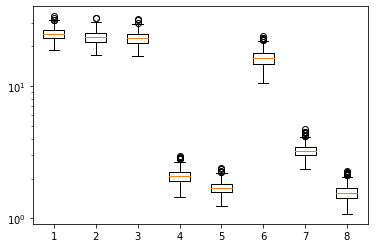

In [64]:
plt.boxplot([ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8])
plt.yscale("log")

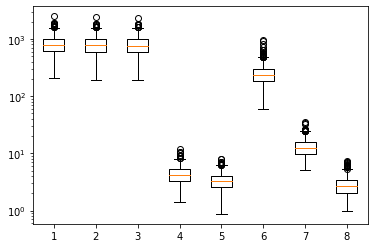

In [65]:
plt.boxplot([ap1, ap2, ap3, ap4, ap5, ap6, ap7, ap8])
plt.yscale("log")

### n = 90

In [100]:
n = 90

In [96]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [98]:
D_w = weighted_incidence(cov_est(0.4).fit(X).S)

In [99]:
D_w.shape

(102, 121)

In [101]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 1, D).fit(X,y)
    clf5 = SL(0.1, 1, D).fit(X,y)
    clf6 = GTV(5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0, 0.15, 0, D_oracle).fit(X,y)
    clf8 = OUR(0.5, 1, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [102]:
def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    clf4 = FL(0, 1, D).fit(X,y)
    clf5 = SL(0.1, 1, D).fit(X,y)
    clf6 = GTV(5, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0, 0.15, 0, D_oracle).fit(X,y)
    clf8 = OUR(0.5, 1, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [103]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [104]:
br1 = [l[0] for l in l2s]
br2 = [l[1] for l in l2s]
br3 = [l[2] for l in l2s]
br4 = [l[3] for l in l2s]
br5 = [l[4] for l in l2s]
br6 = [l[5] for l in l2s]
br7 = [l[6] for l in l2s]
br8 = [l[7] for l in l2s]

In [105]:
bp1 = [l[0] for l in preds]
bp2 = [l[1] for l in preds]
bp3 = [l[2] for l in preds]
bp4 = [l[3] for l in preds]
bp5 = [l[4] for l in preds]
bp6 = [l[5] for l in preds]
bp7 = [l[6] for l in preds]
bp8 = [l[7] for l in preds]


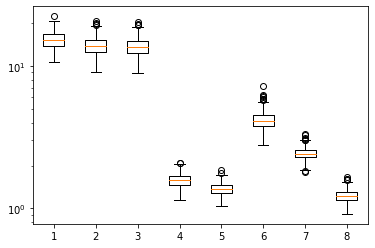

In [106]:
plt.boxplot([br1, br2, br3, br4, br5, br6, br7, br8])
plt.yscale("log")

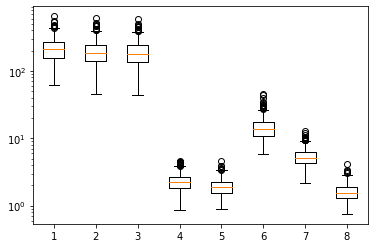

In [107]:
plt.boxplot([bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8])
plt.yscale("log")

### n = 120

In [213]:
n = 120

In [214]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [215]:
D_w = weighted_incidence(cov_est(0.35).fit(X).S)

In [216]:
D_w.shape

(148, 121)

In [217]:
def trial1():
    X, y = gauss_sample(115, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf4 = FL(2,5, D).fit(X,y)
    clf5 = SL(1, 3, D).fit(X,y)
    clf6 = GTV(3, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.35, 0, 0, D_oracle).fit(X,y)
    clf8 = OUR(3, 1, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(115, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.001).fit(X,y)
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf4 = FL(2,5, D).fit(X,y)
    clf5 = SL(1, 3, D).fit(X,y)
    clf6 = GTV(3, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.35, 0, 0, D_oracle).fit(X,y)
    clf8 = OUR(3, 1, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [218]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [219]:
cr1 = [l[0] for l in l2s]
cr2 = [l[1] for l in l2s]
cr3 = [l[2] for l in l2s]
cr4 = [l[3] for l in l2s]
cr5 = [l[4] for l in l2s]
cr6 = [l[5] for l in l2s]
cr7 = [l[6] for l in l2s]
cr8 = [l[7] for l in l2s]

In [220]:
cp1 = [l[0] for l in preds]
cp2 = [l[1] for l in preds]
cp3 = [l[2] for l in preds]
cp4 = [l[3] for l in preds]
cp5 = [l[4] for l in preds]
cp6 = [l[5] for l in preds]
cp7 = [l[6] for l in preds]
cp8 = [l[7] for l in preds]

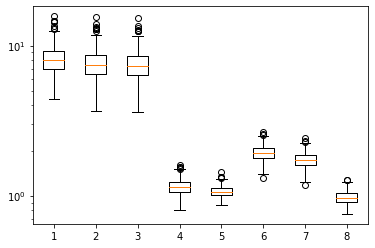

In [221]:
plt.boxplot([cr1, cr2, cr3, cr4, cr5, cr6, cr7, cr8])
plt.yscale("log")

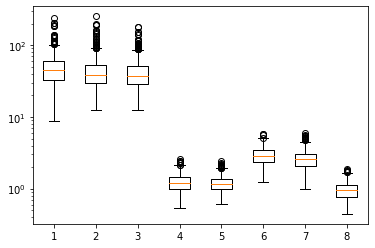

In [222]:
plt.boxplot([cp1, cp2, cp3, cp4, cp5, cp6, cp7, cp8])
plt.yscale("log")

### n = 150

In [227]:
n = 150

In [228]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)


In [229]:
D_w = weighted_incidence(cov_est(0.31).fit(X).S)

In [230]:
D_w.shape

(176, 121)

In [231]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.1).fit(X,y)
    clf4 = FL(2,5, D).fit(X,y)
    clf5 = SL(0, 5, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.35, 0.15, 0, D_oracle).fit(X,y)
    clf8 = OUR(2,3 , D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.1).fit(X,y)
    clf4 = FL(2,5, D).fit(X,y)
    clf5 = SL(0, 5, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.35, 0.15, 0, D_oracle).fit(X,y)
    clf8 = OUR(2,3 , D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [232]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [233]:
dr1 = [l[0] for l in l2s]
dr2 = [l[1] for l in l2s]
dr3 = [l[2] for l in l2s]
dr4 = [l[3] for l in l2s]
dr5 = [l[4] for l in l2s]
dr6 = [l[5] for l in l2s]
dr7 = [l[6] for l in l2s]
dr8 = [l[7] for l in l2s]

In [234]:
dp1 = [l[0] for l in preds]
dp2 = [l[1] for l in preds]
dp3 = [l[2] for l in preds]
dp4 = [l[3] for l in preds]
dp5 = [l[4] for l in preds]
dp6 = [l[5] for l in preds]
dp7 = [l[6] for l in preds]
dp8 = [l[7] for l in preds]

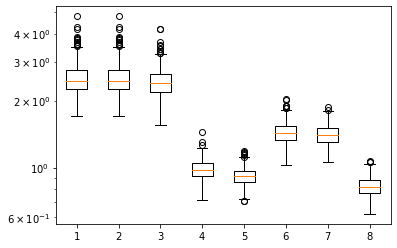

In [235]:
plt.boxplot([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8])
plt.yscale("log")

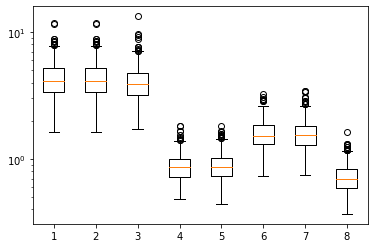

In [236]:
plt.boxplot([dp1, dp2, dp3, dp4, dp5, dp6, dp7, dp8])
plt.yscale("log")

### n = 180

In [322]:
n = 180

In [310]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [311]:
D_w = weighted_incidence(cov_est(0.27).fit(X).S)

In [312]:
D_w.shape

(248, 121)

In [313]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.1).fit(X,y)
    clf4 = FL(0, 5, D).fit(X,y)
    clf5 = SL(0, 3, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.5, 0.2, 0, D_oracle).fit(X,y)
    clf8 = OUR(3, 2, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.1).fit(X,y)
    clf4 = FL(0, 5, D).fit(X,y)
    clf5 = SL(0, 3, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.5, 0.2, 0, D_oracle).fit(X,y)
    clf8 = OUR(3, 2, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [321]:
def trial_sl():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf5 = SL(0, 3.5, D).fit(X,y)
    return clf5.l2_risk(beta_star) 

In [323]:
er5 = Parallel(n_jobs=8)(delayed(trial_sl)() for i in range(500))

In [314]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [315]:
er1 = [l[0] for l in l2s]
er2 = [l[1] for l in l2s]
er3 = [l[2] for l in l2s]
er4 = [l[3] for l in l2s]
er5 = [l[4] for l in l2s]
er6 = [l[5] for l in l2s]
er7 = [l[6] for l in l2s]
er8 = [l[7] for l in l2s]

In [316]:
ep1 = [l[0] for l in preds]
ep2 = [l[1] for l in preds]
ep3 = [l[2] for l in preds]
ep4 = [l[3] for l in preds]
ep5 = [l[4] for l in preds]
ep6 = [l[5] for l in preds]
ep7 = [l[6] for l in preds]
ep8 = [l[7] for l in preds]

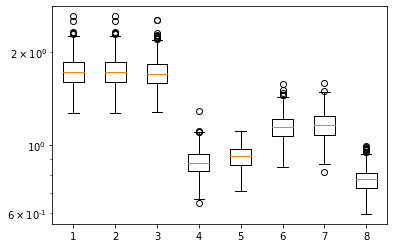

In [317]:
plt.boxplot([er1, er2, er3, er4, er5, er6, er7, er8])
plt.yscale("log")

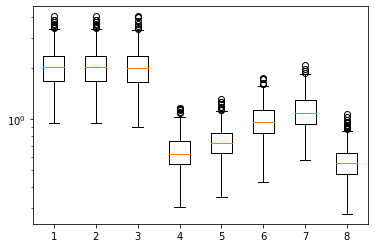

In [318]:
plt.boxplot([ep1, ep2, ep3, ep4, ep5, ep6, ep7, ep8])
plt.yscale("log")

### n = 210

In [251]:
n = 210

In [252]:
X, y = gauss_sample(n, p, beta_star, Psi, sigma)

In [253]:
D_w = weighted_incidence(cov_est(0.25).fit(X).S)

In [254]:
D_w.shape

(286, 121)

In [255]:
def trial1():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.1).fit(X,y)
    clf4 = FL(0, 3, D).fit(X,y)
    clf5 = SL(0.001, 3, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.5, 0.25, 0, D_oracle).fit(X,y)
    clf8 = OUR(2, 2, D).fit(X,y)
    return [c.l2_risk(beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

def trial2():
    X, y = gauss_sample(n, p, beta_star, Psi, sigma)
    clf1 = OLR().fit(X, y)
    clf2 = LA(l1 = 0).fit(X,y)
    clf3 = EN(l1= 0, l2=0.1).fit(X,y)
    clf4 = FL(0, 3, D).fit(X,y)
    clf5 = SL(0.001, 3, D).fit(X,y)
    clf6 = GTV(2, 0, 0, D_w).fit(X,y)
    clf7 = GTV(0.5, 0.25, 0, D_oracle).fit(X,y)
    clf8 = OUR(2, 2, D).fit(X,y)
    X2, y2 = gauss_sample(n, p, beta_star, Psi, sigma)
    return [-c.score(X2, X2@beta_star) for c in [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]]

In [256]:
l2s = Parallel(n_jobs=8)(delayed(trial1)() for i in range(500))
preds = Parallel(n_jobs=8)(delayed(trial2)() for i in range(500))

In [257]:
fr1 = [l[0] for l in l2s]
fr2 = [l[1] for l in l2s]
fr3 = [l[2] for l in l2s]
fr4 = [l[3] for l in l2s]
fr5 = [l[4] for l in l2s]
fr6 = [l[5] for l in l2s]
fr7 = [l[6] for l in l2s]
fr8 = [l[7] for l in l2s]

In [258]:
fp1 = [l[0] for l in preds]
fp2 = [l[1] for l in preds]
fp3 = [l[2] for l in preds]
fp4 = [l[3] for l in preds]
fp5 = [l[4] for l in preds]
fp6 = [l[5] for l in preds]
fp7 = [l[6] for l in preds]
fp8 = [l[7] for l in preds]

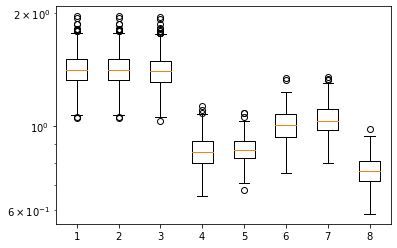

In [261]:
plt.boxplot([fr1, fr2, fr3, fr4, fr5, fr6, fr7, fr8])
plt.yscale("log")

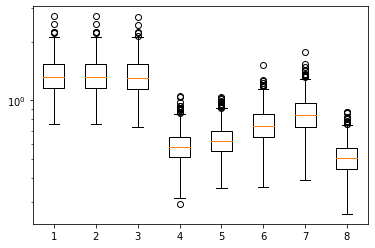

In [262]:
plt.boxplot([fp1, fp2, fp3, fp4, fp5, fp6, fp7, fp8])
plt.yscale("log")

### plots

In [263]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'

In [264]:
LA_risk_med = [np.median(r) for r in [ar1, br1, cr1, dr1, er1, fr1]]
LA_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar1, br1, cr1, dr1, er1, fr1]], [np.quantile(r, 0.75) - np.median(r) for r in [ar1, br1, cr1, dr1, er1, fr1]]]

In [265]:
EN_risk_med = [np.median(r) for r in [ar3, br3, cr3, dr3, er3, fr3]]
EN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar3, br3, cr3, dr3, er3, fr3]], [np.quantile(r, 0.75) - np.median(r) for r in [ar3, br3, cr3, dr3, er3, fr3]]]

In [266]:
FL_risk_med = [np.median(r) for r in [ar4, br4, cr4, dr4, er4, fr4]]
FL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar4, br4, cr4, dr4, er4, fr4]], [np.quantile(r, 0.75) - np.median(r) for r in [ar4, br4, cr4, dr4, er4, fr4]]]

In [324]:
SL_risk_med = [np.median(r) for r in [ar5, br5, cr5, dr5, er5, fr5]]
SL_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar5, br5, cr5, dr5, er5, fr5]], [np.quantile(r, 0.75) - np.median(r) for r in [ar5, br5, cr5, dr5, er5, fr5]]]

In [326]:
SL_risk_err

[[0.11769651180848117,
  0.08363678132305408,
  0.05922282836138759,
  0.04739207027700565,
  0.0406789120833414,
  0.04386695022334597],
 [0.1300776298041233,
  0.09028242903133643,
  0.06235859422808754,
  0.052488384832574564,
  0.04507920641981855,
  0.04508041892223191]]

In [268]:
GTVEST_risk_med = [np.median(r) for r in [ar6, br6, cr6, dr6, er6, fr6]]
GTVEST_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar6, br6, cr6, dr6, er6, fr6]], [np.quantile(r, 0.75) - np.median(r) for r in [ar6, br6, cr6, dr6, er6, fr6]]]

In [269]:
GTVORC_risk_med = [np.median(r) for r in [ar7, br7, cr7, dr7, er7, fr7]]
GTVORC_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar7, br7, cr7, dr7, er7, fr7]], [np.quantile(r, 0.75) - np.median(r) for r in [ar7, br7, cr7, dr7, er7, fr7]]]

In [270]:
GEN_risk_med = [np.median(r) for r in [ar8, br8, cr8, dr8, er8, fr8]]
GEN_risk_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ar8, br8, cr8, dr8, er8, fr8]], [np.quantile(r, 0.75) - np.median(r) for r in [ar8, br8, cr8, dr8, er8, fr8]]]

In [271]:
xs = ["60","90" ,"120" ,"150" ,"180", "210"]

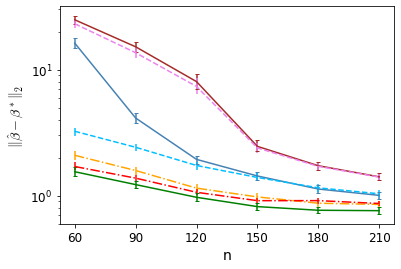

In [272]:
plt.errorbar(xs, LA_risk_med, yerr = LA_risk_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_risk_med, yerr = EN_risk_err, color = 'violet', fmt = '--',label = "EN")
plt.errorbar(xs, FL_risk_med, yerr = FL_risk_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_risk_med, yerr = SL_risk_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_risk_med, yerr = GTVEST_risk_err, capsize = 2, color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_risk_med, yerr = GTVORC_risk_err, color = 'deepskyblue', fmt = '--',label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_risk_med, yerr = GEN_risk_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.yticks([ 1, 10], size = 12)
plt.xticks(xs, size = 12)
plt.xlabel(r"n", size = 14)
plt.ylabel(r'$\| \hat{\beta} - \beta^*\|_2$', size = 14)
plt.savefig('145a_v2.jpg', bbox_inches='tight', dpi = 600)

In [273]:
LA_pred_med = [np.median(r) for r in [ap1, bp1, cp1, dp1, ep1, fp1]]
LA_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap1, bp1, cp1, dp1, ep1, fp1]], [np.quantile(r, 0.75) - np.median(r) for r in [ap1, bp1, cp1, dp1, ep1, fp1]]]

In [274]:
EN_pred_med = [np.median(r) for r in [ap3, bp3, cp3, dp3, ep3, fp3]]
EN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap3, bp3, cp3, dp3, ep3, fp3]], [np.quantile(r, 0.75) - np.median(r) for r in [ap3, bp3, cp3, dp3, ep3, fp3]]]

In [275]:
FL_pred_med = [np.median(r) for r in [ap4, bp4, cp4, dp4, ep4, fp4]]
FL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap4, bp4, cp4, dp4, ep4, fp4]], [np.quantile(r, 0.75) - np.median(r) for r in [ap4, bp4, cp4, dp4, ep4, fp4]]]

In [276]:
SL_pred_med = [np.median(r) for r in [ap5, bp5, cp5, dp5, ep5, fp5]]
SL_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap5, bp5, cp5, dp5, ep5, fp5]], [np.quantile(r, 0.75) - np.median(r) for r in [ap5, bp5, cp5, dp5, ep5, fp5]]]

In [277]:
GTVEST_pred_med = [np.median(r) for r in [ap6, bp6, cp6, dp6, ep6, fp6]]
GTVEST_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap6, bp6, cp6, dp6, ep6, fp6]], [np.quantile(r, 0.75) - np.median(r) for r in [ap6, bp6, cp6, dp6, ep6, fp6]]]

In [278]:
GTVORC_pred_med = [np.median(r) for r in [ap7, bp7, cp7, dp7, ep7, fp7]]
GTVORC_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap7, bp7, cp7, dp7, ep7, fp7]], [np.quantile(r, 0.75) - np.median(r) for r in [ap7, bp7, cp7, dp7, ep7, fp7]]]

In [279]:
GEN_pred_med = [np.median(r) for r in [ap8, bp8, cp8, dp8, ep8, fp8]]
GEN_pred_err = [[np.median(r) - np.quantile(r, 0.25) for r in [ap8, bp8, cp8, dp8, ep8, fp8]], [np.quantile(r, 0.75) - np.median(r) for r in [ap8, bp8, cp8, dp8, ep8, fp8]]]

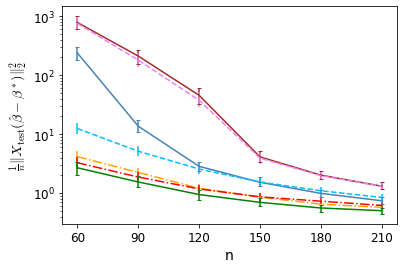

In [280]:
plt.errorbar(xs, LA_pred_med, yerr = LA_pred_err, capsize = 2, color = 'brown', label = "OLS, LASSO")
plt.errorbar(xs, EN_pred_med, yerr = EN_pred_err, color = 'violet', fmt = '--',label = "EN")
plt.errorbar(xs, FL_pred_med, yerr = FL_pred_err, fmt = '-.',color = 'orange', label = "FL")
plt.errorbar(xs, SL_pred_med, yerr = SL_pred_err, fmt = '-.', color = 'red', label = "SL")
plt.errorbar(xs, GTVEST_pred_med, yerr = GTVEST_pred_err, capsize = 2,color = 'steelblue', label = "GTV")
plt.errorbar(xs, GTVORC_pred_med, yerr = GTVORC_pred_err, color = 'deepskyblue', fmt = '--',label = "GTV-oracle", linewidth = 1.5)
plt.errorbar(xs, GEN_pred_med, yerr = GEN_pred_err, capsize = 2, color = 'green', label = "GEN")
plt.yscale("log")
plt.yticks([1, 10, 100, 1000], size = 12)
plt.xticks(xs, size = 12)
plt.xlabel(r"n", size = 14)
plt.ylabel(r'$\frac{1}{n}\| X_{\mathrm{test}}(\hat{\beta} - \beta^*)\|_2^2$', size = 14)
plt.savefig('145b_v2.jpg', bbox_inches='tight', dpi = 600)